In [1]:
import time
start_time=time.time()

In [2]:
import sys
from pathlib import Path
import json
import numpy as np
from astropy.io import fits
#import strucfunc
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


In [3]:
dist = 62000 #parsecs
pix = 0.2 #arcsec
pc = dist*(2*np.pi) / (360 * 60 * 60)
s0=(0.9*pc)
pc,s0

(0.3005844822879123, 0.27052603405912107)

In [4]:
hdu = fits.open("Obs/ngc346-hi-6563-bin01-vmean.fits")
hdu.info()

Filename: Obs/ngc346-hi-6563-bin01-vmean.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU    1953   ()      
  1  DATA          1 ImageHDU        40   (346, 326)   float32   
  2  STAT          1 ImageHDU        40   (346, 326)   float32   


In [5]:
vha = hdu["DATA"].data.astype("float")

In [6]:
iha = fits.open(
    "Obs/ngc346-hi-6563-bin01-sum.fits"
)["DATA"].data.astype("float")

In [7]:
m = ~np.isfinite(iha * vha) | (iha < 0.0)
iha[m] = 0.0
vha[m] = np.nanmean(vha)
iha /= iha.max()

<ipython-input-7-8700146699bb>:1: RuntimeWarning: invalid value encountered in less
  m = ~np.isfinite(iha * vha) | (iha < 0.0)


In [8]:
good = (~m) & (iha > 0.001)

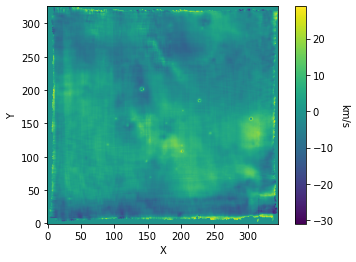

In [9]:
fig, ax = plt.subplots()


dataRV=vha-np.mean(vha[good])
plt.figure(1)
plt.imshow(dataRV, cmap='viridis')
cbar = plt.colorbar()
#plt.clim(225,350)
cbar.set_label('km/s', rotation=270, labelpad=15)  

ax.set_xlabel('X')
ax.set_ylabel('Y')


#ax.text(0.9, 0.1, '10 pc',
#        verticalalignment='bottom', horizontalalignment='right',
#        transform=ax.transAxes,
#        color='black', fontsize=20)
    
#plt.axhline(y=50, xmin=0.59, xmax=0.925, linewidth=2, color = 'k')


plt.gca().invert_yaxis()

In [10]:
RV=pd.DataFrame(vha[good])

In [11]:
RV=RV.stack().reset_index()

Text(0.5, 6.79999999999999, 'Radial velocity [km/s]')

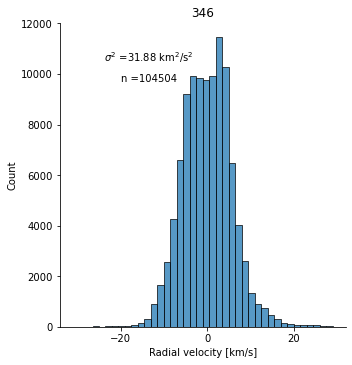

In [12]:
sns.displot(RV[0]-RV[0].mean(),bins=40)
#plt.xlim(-18,10)

plt.text(0.25, 1.15,'n ='+str(RV[0].count()), ha='center', va='center', transform=ax.transAxes, color='k')
#plt.text(0.80, 0.82,'$μ$ ='+str(np.round(RV[0].mean(),2))+' km/s', ha='center', va='center', transform=ax.transAxes, color='k')
plt.text(0.25, 1.25,'$σ^{2}$ ='+str(np.round(RV[0].var(),2))+' km$^{2}$/s$^{2}$', ha='center', va='center', transform=ax.transAxes, color='k')

plt.title('346')

plt.rcParams["font.family"]="Times New Roman"
plt.rcParams["font.size"]="15"
plt.xlabel('Radial velocity [km/s]')


In [13]:
df=pd.DataFrame(vha[good]).stack().reset_index().rename(columns={'level_0':'X', 'level_1':'Y', 0:'RV'})
df.describe()

,X,Y,RV
count,104504.000000,104504.0,104504.000000
mean,52251.500000,0.0,166.113623
std,30167.850603,0.0,5.646186
min,0.000000,0.0,135.150436
25%,26125.750000,0.0,162.129833
50%,52251.500000,0.0,166.107948
75%,78377.250000,0.0,169.786247
max,104503.000000,0.0,194.991547


In [14]:
import pickle

f = open('VF\\N346.pkl',"wb")
pickle.dump(df,f)
f.close()

In [15]:
N346 = {'vv' : vha,
       'sb' : iha,
        'pc' : pc,
        's0' : s0,
        'pix' : pix,
      }
N346

{'vv': array([[166.11362322, 166.11362322, 166.11362322, ..., 166.11362322,
         166.11362322, 166.11362322],
        [166.11362322, 166.11362322, 166.11362322, ..., 166.11362322,
         166.11362322, 166.11362322],
        [166.11362322, 166.11362322, 166.11362322, ..., 166.11362322,
         166.11362322, 166.11362322],
        ...,
        [166.11362322, 166.11362322, 166.11362322, ..., 166.11362322,
         166.11362322, 166.11362322],
        [166.11362322, 166.11362322, 166.11362322, ..., 166.11362322,
         166.11362322, 166.11362322],
        [166.11362322, 166.11362322, 166.11362322, ..., 166.11362322,
         166.11362322, 166.11362322]]),
 'sb': array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 'pc': 0.3005844822879123,
 's0': 0.27052603405912107,
 'pix': 0.2}

In [16]:
f = open('VFM\\N346.pkl',"wb")
pickle.dump(N346,f)
f.close()

In [17]:
print("--- %s seconds ---" % (time.time()-start_time))

--- 9.758116006851196 seconds ---
